In [6]:
#import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as ma
import scipy as sp
import sklearn as sl

In [7]:
data = pd.read_csv('new_refined_data.csv')
data

,Unnamed: 0,07,10,100,1000,10th,11841,12,15,16,...,xsvmrx,ye,yeah,year,years,yes,yesterday,yrs,zrn5jn,Label
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Non-Fact
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Non-Fact
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Non-Fact
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Non-Fact
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Non-Fact
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Non-Fact
338,338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Non-Fact
339,339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Non-Fact
340,340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Non-Fact


In [8]:
#A1

In [9]:
def evaluate_vectors_inbuilt(A,B):
    A = np.array(A)
    B = np.array(B)
    vector = A-B
    length = np.linalg.norm(vector)
    return np.dot(A,B) ,length

def evaluate_vectors_own(A,B):
    dot_product = 0
    length = 0
    for i in range(len(A)):
        dot_product += A[i]*B[i]
        length += ((A[i]-B[i]) * (A[i]-B[i]))

    return dot_product,ma.sqrt(length)
A = [1,2,3,4,5,6,7,8,9]
B = [9,8,7,6,5,4,3,2,1]
print("Dot and length using inbuilt functions :",evaluate_vectors_inbuilt(A,B))
print("Dot and length using manual code :",evaluate_vectors_own(A,B))


Dot and length using inbuilt functions : (np.int64(165), np.float64(15.491933384829668))
Dot and length using manual code : (165, 15.491933384829668)


In [10]:
#A2

In [11]:
def mean_var_std(data):
    n = len(data)
    mean = sum(data)/n
    v=0
    for i in data:
        v += ((i-mean)**2)
    var = v/(n-1)
    std = ma.sqrt(var)
    return mean,var,std
def matrix_calculation(matrix):
    answer = {}
    for j in range(len(matrix)):
        a,b,c = mean_var_std(matrix[:][j])
        answer[j]=[a,b,c]
    return answer
matrix_calculation(data.iloc[:342,1:1320].to_numpy())

mean1 = np.mean(data['07'],axis = 0)
mean2 = np.mean(data['10'],axis = 0)

std1 = np.std(data['07'])
std2 = np.std(data['10'])

print(f'distance between two centroids :{np.linalg.norm(mean1-mean2)}')

distance between two centroids :0.004831084751201533


In [12]:
#A3

(array([[ 9.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
        [11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]),
 array([   0. ,  524.8, 1049.6, 1574.4, 2099.2, 2624. , 3148.8, 3673.6,
        4198.4, 4723.2, 5248. ]),
 <a list of 2 BarContainer objects>)

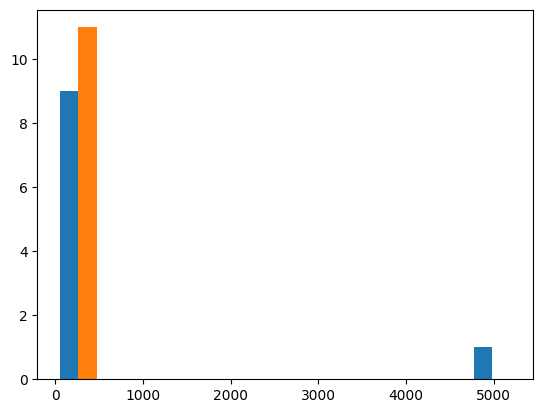

In [13]:
x = np.histogram(data.iloc[1:5,1:-2])
plt.hist(x)

In [14]:
#A4

[np.float64(0.05517703858235759), np.float64(0.32363347453866453), np.float64(0.20475884708684172), np.float64(0.2759589641003745), np.float64(0.23755367294786595), np.float64(0.26374854863932584), np.float64(0.24759358635625164), np.float64(0.25902347197124986), np.float64(0.25144902545316117), np.float64(0.2568990069984783)]


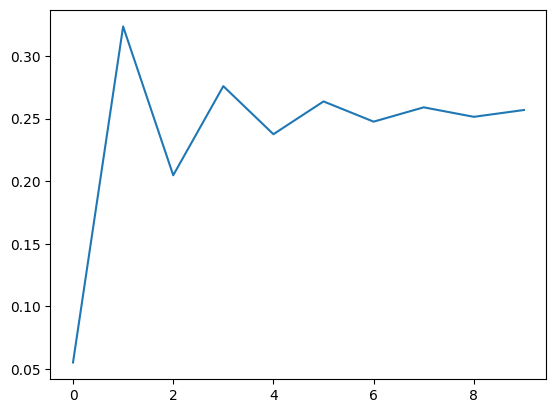

In [15]:
feature1 = data['yesterday']
feature2 = data['yes']
final = []
def minkowski(d1,d2,n):
    for i in range(1,n+1):
        s = 0
        for j in range(len(feature1)):
            s += (feature1[j] - feature2[j])**i
        final.append(s**(1/i))
    print(final)
    return final
    
plt.plot(minkowski(feature1,feature2,10))


In [16]:
#A5

In [17]:
print(sp.spatial.distance.minkowski(feature1,feature2,2))
print('the values are almost similar')

0.32363347453866453
the values are almost similar


In [18]:
#A6

In [19]:
X,y = data.iloc[:,1:3],data['Label'].replace('Non-Fact',0).replace('Fact',1)
x_train,x_test,y_train,y_test = sl.model_selection.train_test_split(X,y,test_size = 0.3)


C:\Users\lokan\AppData\Local\Temp\ipykernel_15000\2692871516.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X,y = data.iloc[:,1:3],data['Label'].replace('Non-Fact',0).replace('Fact',1)


In [20]:
#A7

In [36]:
neigh = sl.neighbors.KNeighborsClassifier(n_neighbors=3)

print(neigh.fit(x_train,y_train))


KNeighborsClassifier(n_neighbors=3)


In [22]:
#A8

In [23]:

print(f'Accuracy :{neigh.score(x_test,y_test)*100}')


Accuracy :56.310679611650485


In [24]:
#A9

In [25]:

print(f'predict y_test {neigh.predict(x_test)}')


predict y_test [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [27]:
#A11

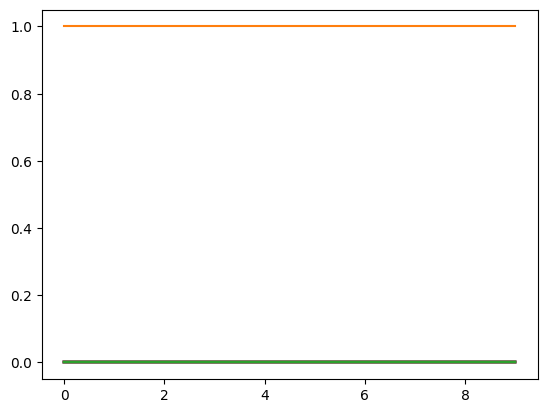

In [28]:
ploting = []
for i in range(1,11):
    neigh = sl.neighbors.KNeighborsClassifier(n_neighbors=i)
    neigh.fit(x_train,y_train)
    dim = neigh.predict(x_test)
    ploting.append(dim)

plt.plot(ploting)




In [ ]:
#A12

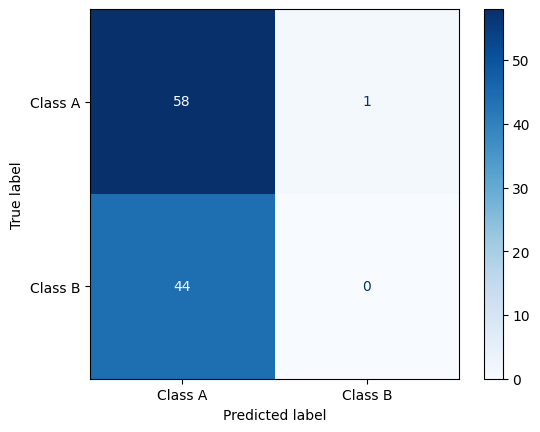

              precision    recall  f1-score   support

           0       0.57      0.98      0.72        59
           1       0.00      0.00      0.00        44

    accuracy                           0.56       103
   macro avg       0.28      0.49      0.36       103
weighted avg       0.33      0.56      0.41       103



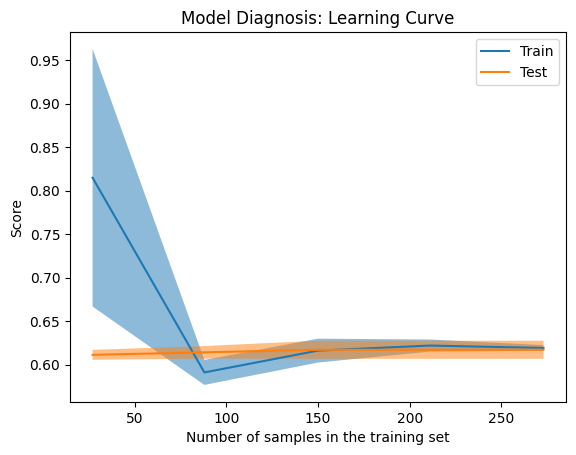

In [94]:
neigh = sl.neighbors.KNeighborsClassifier(n_neighbors=3)

neigh.fit(x_train,y_train)
y2 = neigh.predict(x_test)
cm = sl.metrics.confusion_matrix(y_test, y2)

# 2. Visualize it beautifully
disp = sl.metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class A', 'Class B'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

print(sl.metrics.classification_report(y_test,y2))

import matplotlib.pyplot as plt
from sklearn.model_selection import LearningCurveDisplay, learning_curve

# This command calculates and plots the diagnosis automatically
LearningCurveDisplay.from_estimator(
    neigh, X, y, score_type="both", std_display_style="fill_between"
)

plt.title("Model Diagnosis: Learning Curve")
plt.show()

In [64]:
#A13

In [63]:
neigh = sl.neighbors.KNeighborsClassifier(n_neighbors=3)

neigh.fit(x_train,y_train)
y2 = neigh.predict(x_test)
tp,tn,fp,fn=0,0,0,0
y2 = list(y2)
y_test = list(y_test)
for i in range(len(y2)):
    if y2[i] == y_test[i]:
        if y2[i]==0:
            tn += 1
        else:
            tp += 1
    else:
        if y2[i]==0:
            fn += 1
        else:
            fp += 1

pres = tp/(tp+fp)
recall = tp/(tp+fn)
print(f'Precesion :{pres}')
print(f'Recall :{recall}')
print(f'Accuracy :{tp+tn/(tp+tn+fp+fn)}')
print(f'F1 score :{(2*pres*recall)/(pres+recall) if pres+recall != 0 else 0}')

Precesion :0.0
Recall :0.0
Accuracy :0.5631067961165048
F1 score :0


In [ ]:
#A14

In [92]:
c = np.linalg.pinv(X)@y
neigh = sl.neighbors.KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train,y_train)
print(neigh.predict(x_test))
print(c)
#The difference is knn tries to predict the value based on train and test data but matrix inversion method tries to generalise the future outputs,
# based on the previous inputs by forming a generic coefficients using inversion method

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[2.2754325  1.56375044]
